# Visualizing Classification and Regression Trees with Admissions Data


---
## Introduction

This was a project done during the General Assembly Data Science Course I took. Using admissions data, I build Classification and Regression Trees (CARTs), look at how they work visually, and compare their performance to more standard, parametric models.



On Part 1, I test usage and visualisation of CARTS on a simple dataset. On Part 2, I load a larger admissions dataset and work on optimising that model.

### Install and load the packages required to visually show decision tree branching

In [2]:
# REQUIREMENTS:
# pip install pydotplus
# brew install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Load in admissions data and other python packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Part 1 - Testing CARTS with Simple Admissions Dataset

This section is focused on learning and exploring the code for visualising CART Models. The section uses a simple admissions dataset with only 4 variables. Part 2 then builds upon this with larger admissions dataset.

In [4]:
admit = pd.read_csv('admissions.csv')

### Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

In [10]:
admit = admit.dropna()

In [11]:
admit.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [12]:
Xr = admit[['admit','gre','prestige']]
yr = admit.gpa.values

Xc = admit[['gpa','gre','prestige']]
yc = admit.admit.values

In [142]:
admit.admit.values

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

### For comparison -  cross-validate regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

In [13]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score

In [15]:
# cross val Linear Reg with 4 folds
reg_scores = cross_val_score(LinearRegression(), Xr, yr, cv = 4)

# cross val Logistic Reg with 4 folds
cls_scores = cross_val_score(LogisticRegression(), Xc, yc, cv = 4)

#get scores
print reg_scores, np.mean(reg_scores)
print cls_scores, np.mean(cls_scores)

[ 0.22470964  0.08296819  0.03204903  0.16434809] 0.12601873539
[ 0.71        0.72        0.68686869  0.70408163] 0.70523757988


The regression scores perform poorly (12% R-Squared), while the classification scores perform relatively better (71%). Can they be improved with CARTs?

In [16]:
# fit models
linreg = LinearRegression().fit(Xr, yr) #R2
logreg = LogisticRegression().fit(Xc, yc) #accuracy

### Building regression trees

With `DecisionTreeRegressor`:

* I Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
* I Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [2]:
from sklearn.tree import DecisionTreeRegressor

In [21]:
# set 4 models

classifier_1 = DecisionTreeRegressor(max_depth=1)

classifier_2 = DecisionTreeRegressor(max_depth=2)

classifier_3 = DecisionTreeRegressor(max_depth=3)

classifier_4 = DecisionTreeRegressor(max_depth=4)


In [22]:
# fit the 4 models
classifier_1.fit(Xr, yr)

classifier_2.fit(Xr, yr)

classifier_3.fit(Xr, yr)

classifier_4.fit(Xr, yr)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
# score the 4 models
reg_predict_1 = cross_val_score(classifier_1, Xr, yr, cv = 4)
reg_predict_2 = cross_val_score(classifier_2, Xr, yr, cv = 4)
reg_predict_3 = cross_val_score(classifier_3, Xr, yr, cv = 4)
reg_predict_4 = cross_val_score(classifier_4, Xr, yr, cv = 4)

In [32]:
print reg_predict_1.mean()
print reg_predict_2.mean()
print reg_predict_3.mean()
print reg_predict_4.mean()


0.114774961104
0.127129257986
0.102813557478
0.089435425735


All of the Regression Trees have poor performance. A tree with depth of two has similar performance to a logistic regression.

### Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node

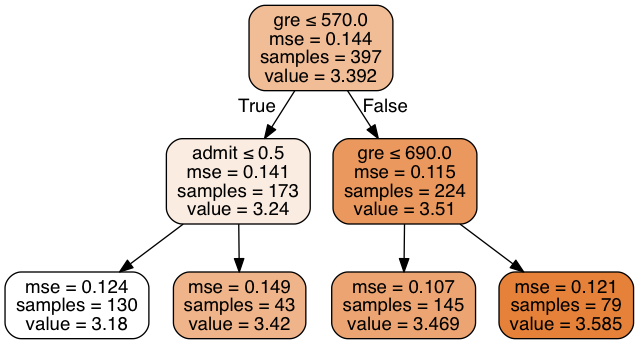

In [40]:
# TEMPLATE CODE
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
export_graphviz(classifier_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 
# To save the image of the tree
# graph.write_png('./dtr1.png')

### Building classification trees

With `DecisionTreeClassifier`:
* Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
* Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

In [43]:
#from sklearn.tree import 
# set 4 models

classifier_c_1 = DecisionTreeClassifier(max_depth=1)

classifier_c_2= DecisionTreeClassifier(max_depth=2)

classifier_c_3 = DecisionTreeClassifier(max_depth=3)

classifier_c_4 = DecisionTreeClassifier(max_depth=4)


# fit the 4 models
classifier_c_1.fit(Xc, yc)

classifier_c_2.fit(Xc, yc)

classifier_c_3.fit(Xc, yc)

classifier_c_4.fit(Xc, yc)

# score the 4 models
reg_predict_c_1 = cross_val_score(classifier_c_1, Xc, yc, cv = 4)
reg_predict_c_2 = cross_val_score(classifier_c_2, Xc, yc, cv = 4)
reg_predict_c_3 = cross_val_score(classifier_c_3, Xc, yc, cv = 4)
reg_predict_c_4 = cross_val_score(classifier_c_4, Xc, yc, cv = 4)

print reg_predict_1.mean()
print reg_predict_2.mean()
print reg_predict_3.mean()
print reg_predict_4.mean()
DecisionTreeClassifier

0.114774961104
0.127129257986
0.102813557478
0.089435425735


sklearn.tree.tree.DecisionTreeClassifier

### Visualize the classification trees

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells the count of each class at that node.

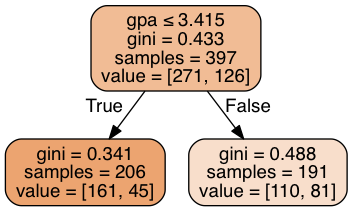

In [48]:
#max_depth = 1
dot_data = StringIO()  

export_graphviz(classifier_c_1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

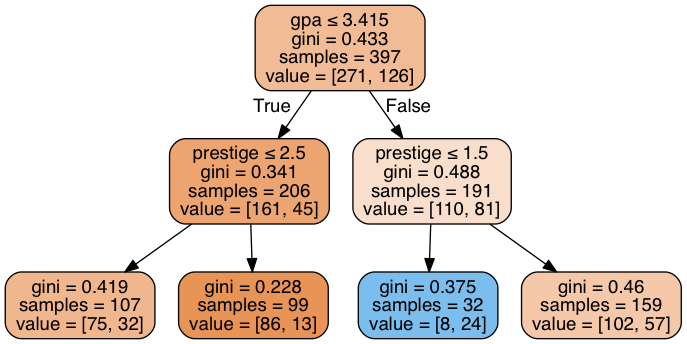

In [49]:
# max_depth = 2

dot_data = StringIO()  

export_graphviz(classifier_c_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

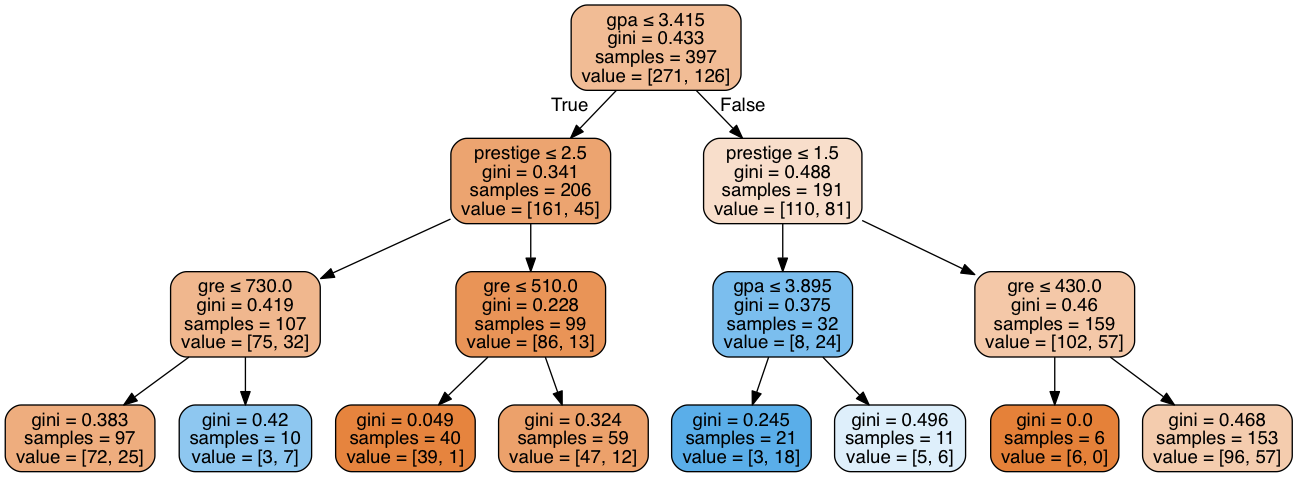

In [50]:
# max_depth = 3

dot_data = StringIO()  

export_graphviz(classifier_c_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

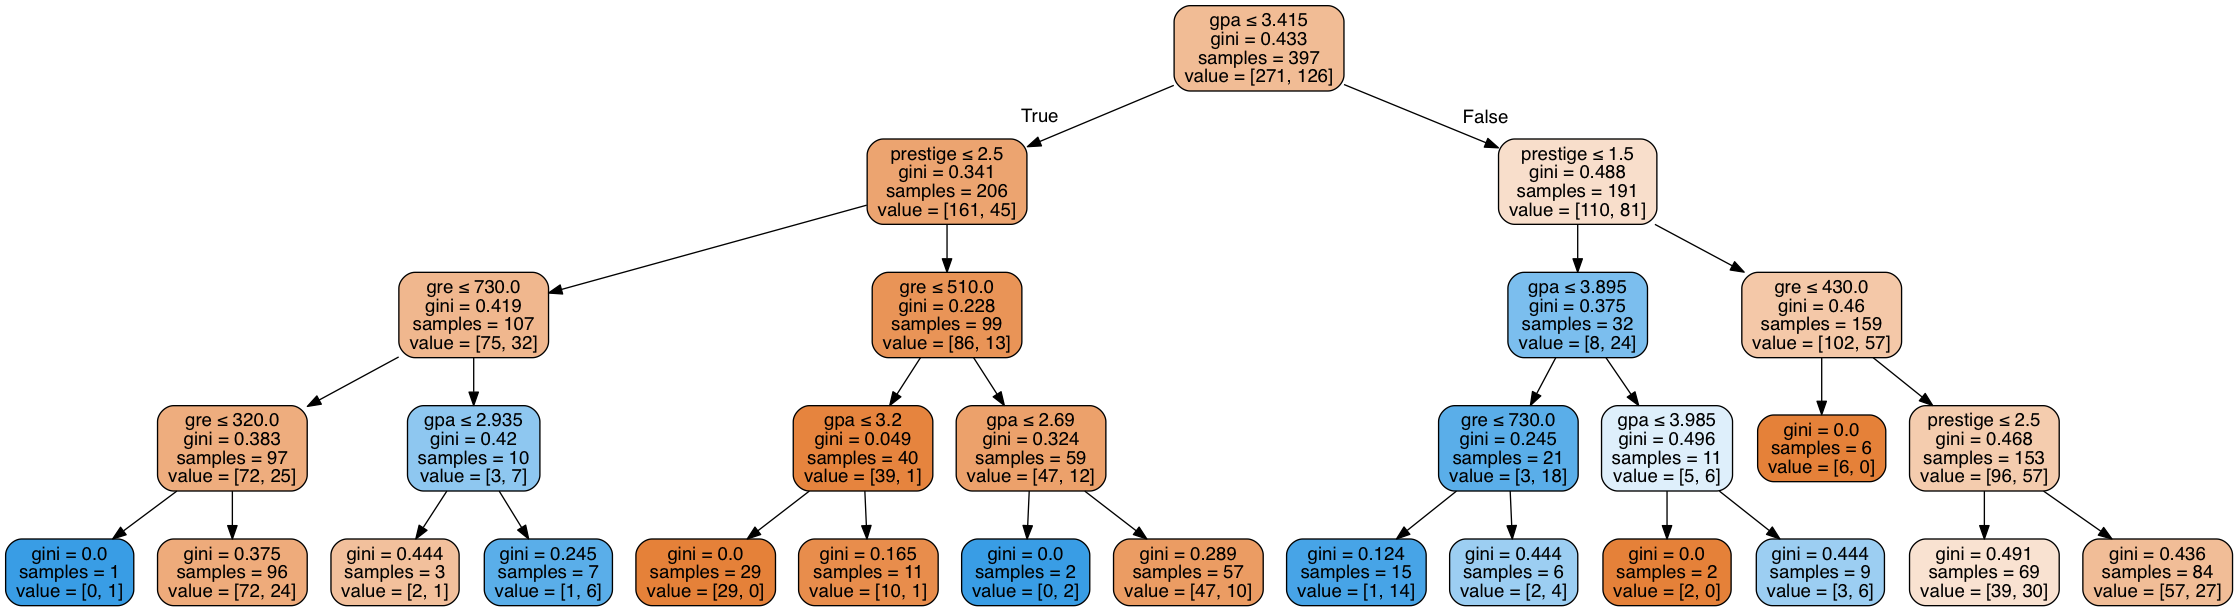

In [51]:
# max_depth = 4

dot_data = StringIO()  

export_graphviz(classifier_c_4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xc.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Part 2 - Optimising CARTS on College Admissions Dataset

In [5]:
col = pd.read_csv('college.csv')

In [79]:
col.head(2)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


In [80]:
col.columns.values

array(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'], dtype=object)

In [82]:
# Set up your X, y variables accordingly
y = col['Private']
X = col[['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate']]

### Building classification trees

With `DecisionTreeClassifier`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.


In [83]:
#set 4 trees
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)
dtcN = DecisionTreeClassifier(max_depth=None)

In [84]:
#fit 4 trees
dtc1.fit(X, y)
dtc2.fit(X, y)
dtc3.fit(X, y)
dtcN.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [85]:
# use CV to evaluate the 4 trees
dtc1_scores = cross_val_score(dtc1, X, y, cv=4)
dtc2_scores = cross_val_score(dtc2, X, y, cv=4)
dtc3_scores = cross_val_score(dtc3, X, y, cv=4)
dtcN_scores = cross_val_score(dtcN, X, y, cv=4)

print dtc1_scores, np.mean(dtc1_scores)
print dtc2_scores, np.mean(dtc2_scores)
print dtc3_scores, np.mean(dtc3_scores)
print dtcN_scores, np.mean(dtcN_scores)

[ 0.87179487  0.82474227  0.83505155  0.83505155] 0.841660058155
[ 0.90769231  0.89690722  0.91752577  0.91237113] 0.908624107851
[ 0.8974359   0.92268041  0.91752577  0.90721649] 0.911214644462
[ 0.88717949  0.91752577  0.86597938  0.90721649] 0.894475284166


#### Using GridSearchCV to find the best decision tree classifier 

As decision trees that are unrestricted will just end up over fitting the training data. Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?


Documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [88]:
from sklearn.model_selection import GridSearchCV

In [135]:
# gridsearch params
param_grid = {'max_depth': range(1,4),
              'max_features': range(2,17),
              'max_leaf_nodes' : range(2,17),
              'min_samples_leaf' : range(2,10),
              'min_samples_split' : range(2,5)
             }            

In [139]:
# Set the gridsearch
CT_gridsearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, verbose = 1)

In [140]:
# use the gridsearchCV model to fit the data
CT_gridsearch.fit(X,y)

Fitting 5 folds for each of 16200 candidates, totalling 81000 fits


[Parallel(n_jobs=1)]: Done 81000 out of 81000 | elapsed:  7.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], 'min_samples_split': [2, 3, 4], 'max_depth': [1, 2, 3], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [141]:
print(CT_gridsearch.best_score_)
print(CT_gridsearch.best_params_)

0.927927927928
{'max_features': 11, 'max_leaf_nodes': 5, 'min_samples_split': 2, 'max_depth': 2, 'min_samples_leaf': 9}


### Evaluation:

The best model has the parameters {'max_features': 11, 'max_leaf_nodes': 5, 'min_samples_split': 2, 'max_depth': 2, 'min_samples_leaf': 9} and an R-Squared of 92.8%. It is better than the base models by about 2%. This is because the gridsearch iterated over every combination of parameters until finding the ideal ones for this data.

### Evaluate Feature Importances

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

In [146]:
#Create a model with the best features found in the Gridsearch

dtc_best = DecisionTreeClassifier(max_depth = 2, 
                                 max_features = 11,
                                 max_leaf_nodes = 5,
                                 min_samples_leaf = 9,
                                 min_samples_split = 2)

In [161]:
#Append column names and feature importances to same DataFrame

fi = pd.DataFrame({
    'feature': X.columns,
    'importance': dtc_best.feature_importances_
})

In [167]:
#Sort by highest values

fi.sort_values('importance', ascending=False)

,feature,importance
6,P.Undergrad,0.450234
7,Outstate,0.325852
5,F.Undergrad,0.223914
0,Apps,0.000000
10,Personal,0.000000
15,Expend,0.000000
14,perc.alumni,0.000000
13,S.F.Ratio,0.000000
12,Terminal,0.000000
11,PhD,0.000000


### Evaluation

It appears that the top three features are the only ones that have an impact. P.Undergra has 45% importance, Outstate 32.6$ and F.Undergrad 22.4%, while the others have 0% importance.

## Conclusion

Using Classification and Regression trees allows for creation of an intuitive model which can be useful for various tasks. Decision Tree models are often preferred due to their ease of understanding, which helps when presenting the models across teams. This project's model achieved a 92.7% R-squared score, meaning that CART models are good choices when prioritising both accuracy and interpretability.